In [208]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as st




#Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results , how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [209]:
# Checking the number of mice.

number_mice = mouse_data_complete["Mouse ID"].nunique()
number_mice

249

In [210]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate_ID = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mice_duplicate_ID 

array(['g989'], dtype=object)

In [211]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicate_ID = mouse_data_complete.loc[mouse_data_complete["Mouse ID"] == "g989", :]
mice_duplicate_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [212]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_dataframe = mouse_data_complete[mouse_data_complete['Mouse ID'].isin(mice_duplicate_ID)==False]
new_dataframe.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [213]:
# Checking the number of mice in the clean DataFrame.
number_clean_mice = new_dataframe["Mouse ID"].nunique()

number_clean_mice

249

In [214]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = new_dataframe['Tumor Volume (mm3)']
median = new_dataframe['Tumor Volume (mm3)']
variance = new_dataframe['Tumor Volume (mm3)']
standard_deviation = new_dataframe['Tumor Volume (mm3)']
sem = new_dataframe['Tumor Volume (mm3)']


summary_statistics = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Variance Tumor Volume":variance, 
                           "Standard DeviationTumor Volume":standard_deviation, 
                           "SEM Tumor Volume":sem})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard DeviationTumor Volume,SEM Tumor Volume
0,45.000000,45.000000,45.000000,45.000000,45.000000
1,38.825898,38.825898,38.825898,38.825898,38.825898
2,35.014271,35.014271,35.014271,35.014271,35.014271
3,34.223992,34.223992,34.223992,34.223992,34.223992
4,32.997729,32.997729,32.997729,32.997729,32.997729
...,...,...,...,...,...
1888,63.145652,63.145652,63.145652,63.145652,63.145652
1889,65.841013,65.841013,65.841013,65.841013,65.841013
1890,69.176246,69.176246,69.176246,69.176246,69.176246
1891,70.314904,70.314904,70.314904,70.314904,70.314904


In [215]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = new_dataframe['Tumor Volume (mm3)'].groupby(new_dataframe['Drug Regimen']).mean()
median = new_dataframe['Tumor Volume (mm3)'].groupby(new_dataframe['Drug Regimen']).median()
variance = new_dataframe['Tumor Volume (mm3)'].groupby(new_dataframe['Drug Regimen']).var()
standard_deviation = new_dataframe['Tumor Volume (mm3)'].groupby(new_dataframe['Drug Regimen']).std()
sem = new_dataframe['Tumor Volume (mm3)'].groupby(new_dataframe['Drug Regimen']).sem()


summary_statistics2 = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":variance, 
                           "Tumor Volume Std. Dev.":standard_deviation, 
                           "Tumor Volume Std. Err.":sem})
summary_statistics2

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [216]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

aggregation_summary =  new_dataframe.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregation_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Text(0.5, 1.0, 'Total number of timepoints')

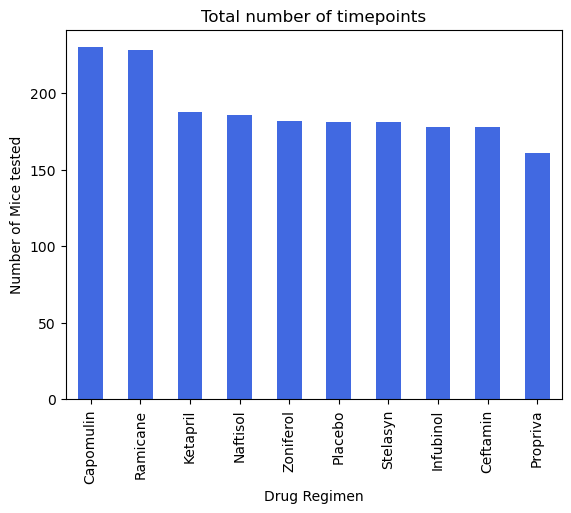

In [217]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_mice = new_dataframe["Drug Regimen"].value_counts()
graph_agg_summary = total_mice.plot.bar(color='royalblue')  
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice tested")
plt.title("Total number of timepoints")

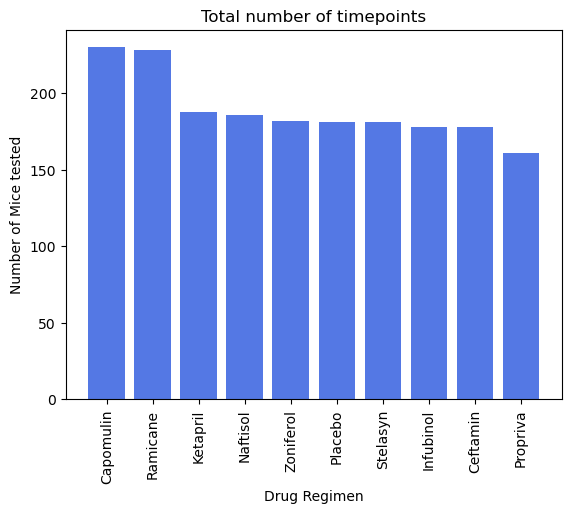

In [218]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
X_axis = total_mice.index.values
Y_axis = total_mice.values
plt.bar(X_axis, Y_axis, color='royalblue', alpha=0.9, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Total number of timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice tested")
plt.xticks(rotation="vertical")
plt.show()

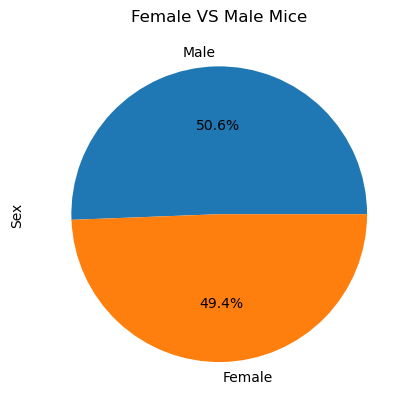

In [219]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

f_vs_m = new_dataframe["Sex"].value_counts()
plt.title("Female VS Male Mice")
f_vs_m.plot.pie(autopct= "%1.1f%%")
plt.show()

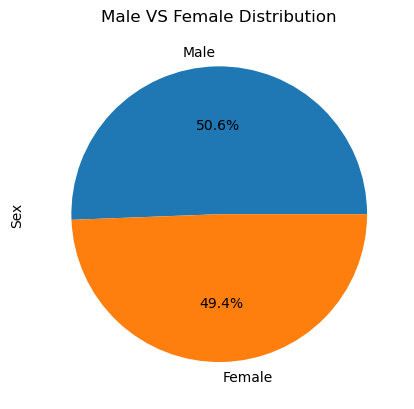

In [220]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label = ['Female', 'Male']
plot = f_vs_m.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male VS Female Distribution')
plt.ylabel('Sex')
plt.show()

In [221]:
####### Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
relevant_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
df_treartment_regimens = new_dataframe[new_dataframe["Drug Regimen"].isin(relevant_treatments)]

# group the data by mouse ID and find the last value for each mouse's tumor volume
grouped = df_treartment_regimens.groupby("Mouse ID")
final_tumor_volumes = grouped["Tumor Volume (mm3)"].last()

# print the final tumor volumes
print(final_tumor_volumes)

Mouse ID
a203    67.973419
a251    65.525743
a275    62.999356
a411    38.407618
a444    43.047543
          ...    
y769    68.594745
y793    31.896238
y865    64.729837
z578    30.638696
z581    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64


In [222]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Filter the data for the four treatment regimens of interest
filter_df = new_dataframe[(new_dataframe['Drug Regimen'] == 'Capomulin') | 
        (new_dataframe['Drug Regimen'] == 'Ramicane') | 
        (new_dataframe['Drug Regimen'] == 'Infubinol') | 
        (new_dataframe['Drug Regimen'] == 'Ceftamin')]

# group the data by mouse ID and find the maximum timepoint for each mouse
grouped = filter_df.groupby("Mouse ID")
max_timepoint = grouped["Timepoint"].max()

# merge the max timepoint data with the original dataframe on the mouse ID and timepoint columns
merged_df = pd.merge(max_timepoint, filter_df, on=["Mouse ID", "Timepoint"], how="left")

# keep only the columns with the final tumor volume for each mouse
final_tumor_volumes = merged_df[["Mouse ID", "Tumor Volume (mm3)"]]

# print the final tumor volumes
print(final_tumor_volumes)

   Mouse ID  Tumor Volume (mm3)
0      a203           67.973419
1      a251           65.525743
2      a275           62.999356
3      a411           38.407618
4      a444           43.047543
..      ...                 ...
95     y769           68.594745
96     y793           31.896238
97     y865           64.729837
98     z578           30.638696
99     z581           62.754451

[100 rows x 2 columns]


In [223]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []




# Locate the rows which contain mice on the current treatment and get the tumor volumes
for treatment in treatments:
    treatment_data = merged_df .loc[merged_df ["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # Add subset
    subset = []
    subset.append(treatment_data)
    
    # Calculate the IQR
    quartiles = treatment_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


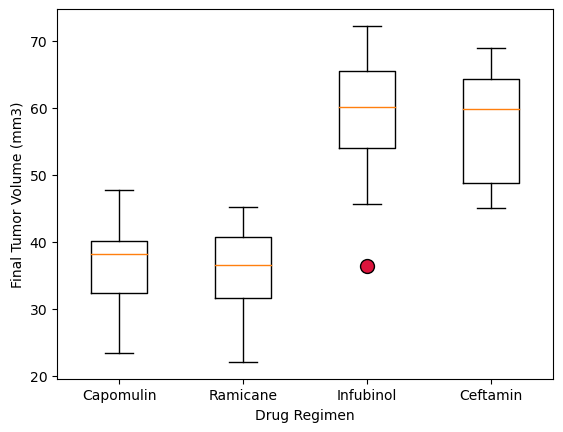

In [224]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
for treatment in treatments:
    tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    final_tumor_vol.append(tumor_vol)

# Generate the box plot
fig1, ax1 = plt.subplots()
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")

# Add the data to the plot
bp = ax1.boxplot(final_tumor_vol, labels=treatments, showfliers=True)
for flier in bp['fliers']:
    flier.set(marker='o', markersize=10, markerfacecolor='crimson', alpha=1)
# Show the plot
plt.show()

Text(0, 0.5, 'Tumor volume (mm3)')

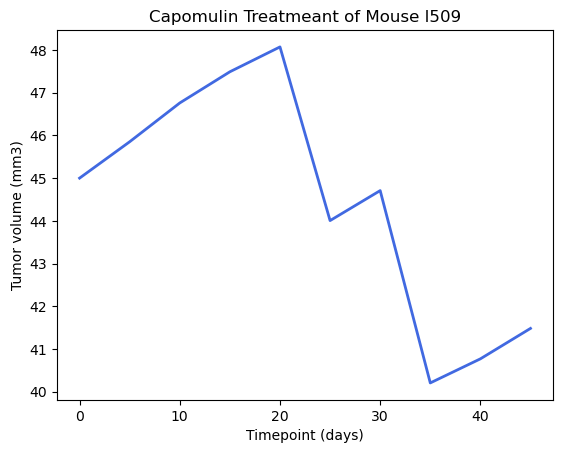

In [225]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

forline = Capomulin.loc[Capomulin["Mouse ID"] == "l509",:]
forline.head()
x_axis = forline["Timepoint"]
size = forline["Tumor Volume (mm3)"]

f1, ax1 = plt.subplots()
plt.title('Capomulin Treatmeant of Mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,color="royalblue", label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

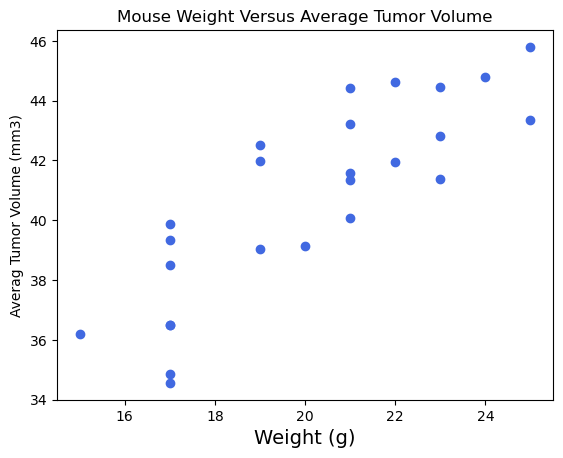

In [226]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

f1, ax1 = plt.subplots()
average_volume =Capomulin.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(average_volume['Weight (g)'],average_volume['Tumor Volume (mm3)'], color="royalblue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

The correlation coefficient between mouse weight and average tumor volume for Capomulin is 0.84


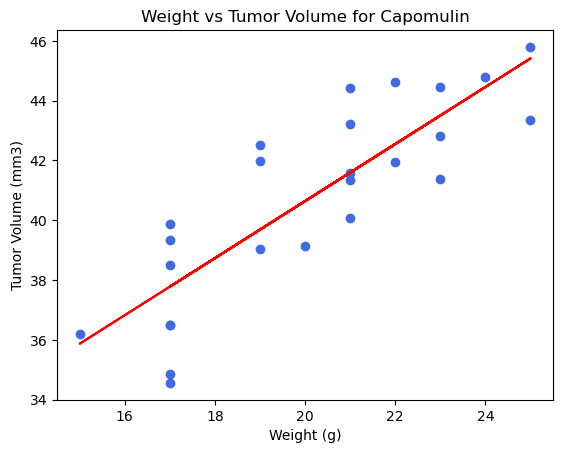

In [227]:
# Calculate correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(average_volume["Weight (g)"], average_volume["Tumor Volume (mm3)"])
print(f"The correlation coefficient between mouse weight and average tumor volume for Capomulin is {round(correlation[0],2)}")


# Regression line
slope, intercept, rvalue, pvalue, stderr = linregress(average_volume["Weight (g)"], average_volume["Tumor Volume (mm3)"])
regress_values = average_volume["Weight (g)"] * slope + intercept

# Scatter plot
plt.scatter(average_volume["Weight (g)"], average_volume["Tumor Volume (mm3)"], color='royalblue')

# Regression line
plt.plot(average_volume["Weight (g)"], regress_values, color='red')

# Labels 
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")

# Show the plot
plt.show()
